In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import yfinance as yf
from datetime import datetime as dt

In [341]:
df = yf.download('TLT', period='max', interval='1d')['Adj Close']
df

[*********************100%***********************]  1 of 1 completed


Date
2002-07-30     40.822689
2002-07-31     41.328461
2002-08-01     41.563835
2002-08-02     41.989502
2002-08-05     42.174778
                 ...    
2023-05-15    103.190002
2023-05-16    102.879997
2023-05-17    102.580002
2023-05-18    101.820000
2023-05-19    101.099998
Name: Adj Close, Length: 5239, dtype: float64

In [342]:
df_return = df.pct_change()
df_return = pd.DataFrame(df_return)
df_return.rename(columns={'Adj Close': 'Return'}, inplace=True)
df_return.dropna(inplace=True)
df_return.head()

,Return
Date,
2002-07-31,0.012389
2002-08-01,0.005695
2002-08-02,0.010241
2002-08-05,0.004412
2002-08-06,-0.008549


In [343]:
df_return['Year'] = df_return.index.year
df_return['Month'] = df_return.index.month
df_return['Day'] = df_return.index.day
print(df_return.head())

              Return  Year  Month  Day
Date                                  
2002-07-31  0.012389  2002      7   31
2002-08-01  0.005695  2002      8    1
2002-08-02  0.010241  2002      8    2
2002-08-05  0.004412  2002      8    5
2002-08-06 -0.008549  2002      8    6


Text(0, 0.5, 'Mean Return')

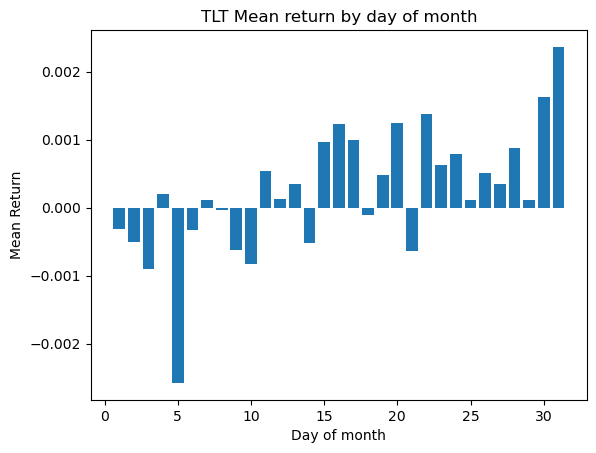

In [344]:
daily_return = df_return.groupby(['Day'])
dr = daily_return.Return.mean()
plt.bar(x = dr.index, height = dr)
plt.title('TLT Mean return by day of month')
plt.xlabel('Day of month')
plt.ylabel('Mean Return')

In [345]:
groups = df_return.groupby(['Year', 'Month'])
eom_group = groups.apply(lambda x: x.tail(5))
eom_group = eom_group.iloc[1:-5,]
eom_group = eom_group.reset_index(level=['Year', 'Month'], drop=True)
print(eom_group)

              Return  Year  Month  Day
Date                                  
2002-08-26  0.000931  2002      8   26
2002-08-27 -0.006280  2002      8   27
2002-08-28  0.005033  2002      8   28
2002-08-29  0.008035  2002      8   29
2002-08-30  0.006007  2002      8   30
...              ...   ...    ...  ...
2023-04-24  0.009674  2023      4   24
2023-04-25  0.014704  2023      4   25
2023-04-26 -0.010658  2023      4   26
2023-04-27 -0.009923  2023      4   27
2023-04-28  0.016131  2023      4   28

[1245 rows x 4 columns]


In [346]:
som_group = groups.apply(lambda x: x.head(5))
som_group = som_group.iloc[1:-5,]
som_group = som_group.reset_index(level=['Year', 'Month'], drop=True)
print(som_group)

              Return  Year  Month  Day
Date                                  
2002-08-01  0.005695  2002      8    1
2002-08-02  0.010241  2002      8    2
2002-08-05  0.004412  2002      8    5
2002-08-06 -0.008549  2002      8    6
2002-08-07  0.002395  2002      8    7
...              ...   ...    ...  ...
2023-04-03  0.004703  2023      4    3
2023-04-04  0.004972  2023      4    4
2023-04-05  0.010455  2023      4    5
2023-04-06  0.002587  2023      4    6
2023-04-10 -0.016125  2023      4   10

[1245 rows x 4 columns]


In [347]:
# buy tlt 5 days before end of the month
# reverse short on the last day of the month
# cover short 5 days into the month

In [348]:
print(len(df_return.index), len(som_group.index), len(eom_group.index))
zeros = len(df_return.index) - len(som_group.index)
l = [0] * zeros

5238 1245 1245


In [349]:
short_dates = list(som_group.index)
long_dates = list(eom_group.index)

In [350]:
len(short_dates)

1245

In [351]:
x=0
for i in range(zeros):
    short_dates.append(x)
    long_dates.append(x)

print(len(short_dates), len(long_dates))

5238 5238


In [352]:
c = 0
d = 0
df_return['Strategy Return'] = 0

for i in df_return.index:
    if i == short_dates[c]:
        df_return['Strategy Return'][i] = df_return['Return'][i] * -1
        c += 1
    elif i == long_dates[d]:
        df_return['Strategy Return'][i] = df_return['Return'][i] * 1
        d += 1
    else:
        df_return['Strategy Return'][i] = 0

df_return

C:\Users\44791\AppData\Local\Temp\ipykernel_22584\3086355911.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_return['Strategy Return'][i] = 0
C:\Users\44791\AppData\Local\Temp\ipykernel_22584\3086355911.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_return['Strategy Return'][i] = df_return['Return'][i] * -1


,Return,Year,Month,Day,Strategy Return
Date,,,,,
2002-07-31,0.012389,2002,7,31,0.000000
2002-08-01,0.005695,2002,8,1,-0.005695
2002-08-02,0.010241,2002,8,2,-0.010241
2002-08-05,0.004412,2002,8,5,-0.004412
2002-08-06,-0.008549,2002,8,6,0.008549
...,...,...,...,...,...
2023-05-15,-0.010358,2023,5,15,0.000000
2023-05-16,-0.003004,2023,5,16,0.000000
2023-05-17,-0.002916,2023,5,17,0.000000


In [353]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
print_full(df_return)

                  Return  Year  Month  Day  Strategy Return
Date                                                       
2002-07-31  1.238947e-02  2002      7   31     0.000000e+00
2002-08-01  5.695215e-03  2002      8    1    -5.695215e-03
2002-08-02  1.024128e-02  2002      8    2    -1.024128e-02
2002-08-05  4.412437e-03  2002      8    5    -4.412437e-03
2002-08-06 -8.548947e-03  2002      8    6     8.548947e-03
2002-08-07  2.394596e-03  2002      8    7    -2.394596e-03
2002-08-08  0.000000e+00  2002      8    8     0.000000e+00
2002-08-09  1.409826e-02  2002      8    9     0.000000e+00
2002-08-12  6.126541e-03  2002      8   12     0.000000e+00
2002-08-13  1.229434e-02  2002      8   13     0.000000e+00
2002-08-14  3.818093e-03  2002      8   14     0.000000e+00
2002-08-15 -8.757956e-03  2002      8   15     0.000000e+00
2002-08-16 -1.115960e-02  2002      8   16     0.000000e+00
2002-08-19  3.055666e-03  2002      8   19     0.000000e+00
2002-08-20  1.113447e-02  2002      8   

In [354]:
strategy = (1+df_return['Strategy Return']).cumprod()
strategy

Date
2002-07-31    1.000000
2002-08-01    0.994305
2002-08-02    0.984122
2002-08-05    0.979779
2002-08-06    0.988156
                ...   
2023-05-15    5.161544
2023-05-16    5.161544
2023-05-17    5.161544
2023-05-18    5.161544
2023-05-19    5.161544
Name: Strategy Return, Length: 5238, dtype: float64

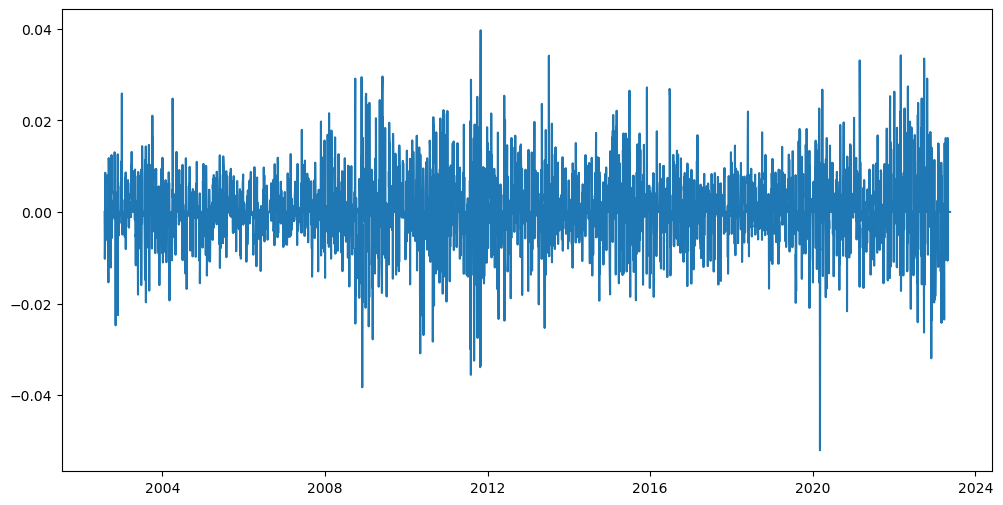

In [355]:
plt.figure(figsize=(12,6))
plt.plot(df_return['Strategy Return'])

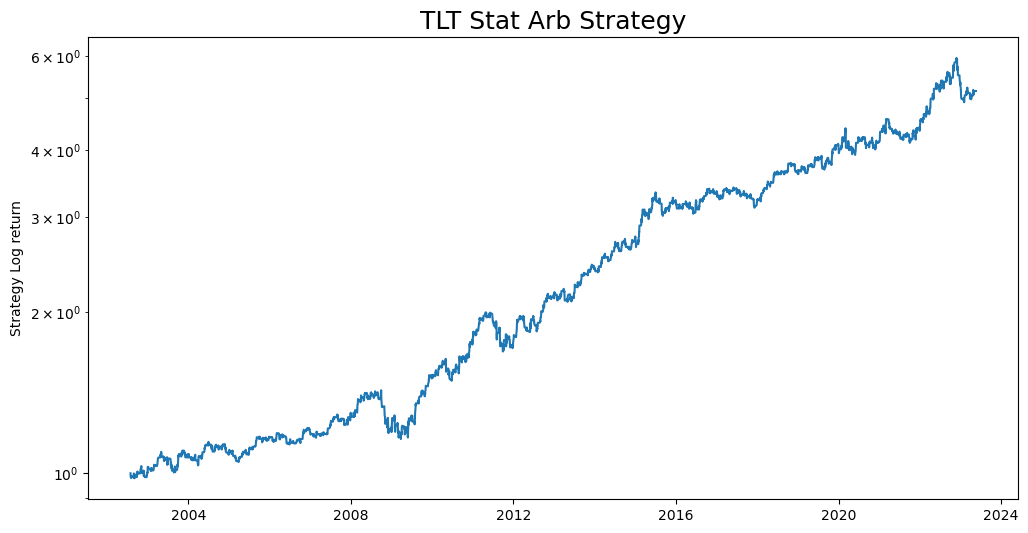

In [358]:
plt.figure(figsize=(12,6))
plt.yscale('log')
plt.title('TLT Stat Arb Strategy', fontsize=18)
plt.ylabel('Strategy Log return')
plt.plot(strategy)

In [463]:
def calculate_MaxDD(dataframe):
    cumreturn = dataframe
    highwatermark = np.zeros(cumreturn.shape)
    drawdown = np.zeros(cumreturn.shape)
    drawdownduration = np.zeros(cumreturn.shape)

    for t in np.arange(1, cumreturn.shape[0]):
        highwatermark[t] = np.maximum(highwatermark[t - 1], cumreturn[t])
        drawdown[t] = (cumreturn[t] - highwatermark[t])/ (highwatermark[t])
        if drawdown[t] == 0:
            drawdownduration[t] = 0
        else:
            drawdownduration[t] = drawdownduration[t - 1] + 1

    maxDD, i = np.min(drawdown), np.argmin(drawdown)
    maxDDD = np.max(drawdownduration)
    DD_Date = cumreturn.index[i]
    return f"Max Drawdown:{round(maxDD*100,2)}%, Max Drawdown Duration: {int(maxDDD)} days, Date of Max DrawDown: {DD_Date}"

In [464]:
calculate_MaxDD(strategy)

'Max Drawdown:-18.91%, Max Drawdown Duration: 341 days, Date of Max DrawDown: 2009-03-25 00:00:00'

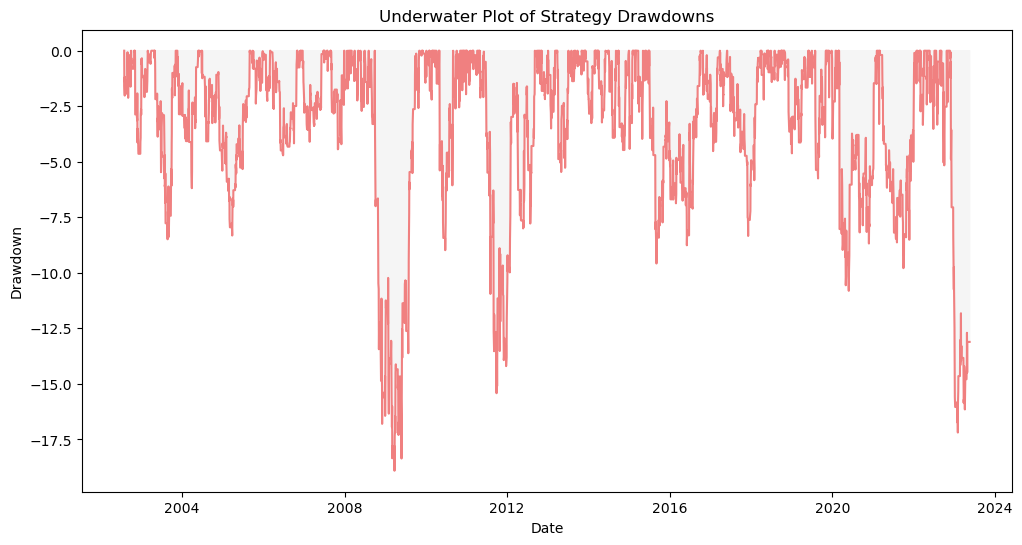

In [465]:
def underwater_plot(dataframe):
    cum_max = dataframe.cummax()
    drawdowns = (dataframe - cum_max) / cum_max
    drawdowns = round(drawdowns*100,2)
    
    plt.figure(figsize=(12, 6))
    plt.plot(drawdowns.index, drawdowns, color="lightcoral")
    plt.fill_between(drawdowns.index, drawdowns, 0, where=drawdowns < 0, interpolate=True, color="whitesmoke")
    plt.xlabel("Date")
    plt.ylabel("Drawdown")
    plt.title("Underwater Plot of Strategy Drawdowns")
    plt.show()
    
underwater_plot(strategy)